In [201]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [202]:
points_left = [[958, 38, 1],
               [1117, 111, 1],
               [874, 285, 1],
               [707, 218, 1],
               [292, 569, 1],
               [770, 969, 1],
               [770, 1465, 1],
               [317, 1057, 1]]
points_right = [[933, 33, 1],
                [1027, 132, 1],
                [692, 223, 1],
                [595, 123, 1],
                [272, 360, 1],
                [432, 814, 1],
                [414, 1284, 1],
                [258, 818, 1]]

points_left = np.array(points_left)
points_right = np.array(points_right)


zipp = list(zip(points_left, points_right))
x1, y1 = zipp[0]
x2, y2 = zipp[1]
x3, y3 = zipp[2]
x4, y4 = zipp[3]
x9, y9 = zipp[4]
x10, y10 = zipp[5]
x11, y11 = zipp[6]
x12, y12 = zipp[7]

x6 = np.array([1094, 536, 1.])
y6 = np.array([980, 535, 1.])
x7 = np.array([862, 729, 1.])
y7 = np.array([652, 638, 1.])
x8 = np.array([710, 648, 1.])
y8 = np.array([567, 532, 1.])
x14 = np.array([1487, 598, 1.])
y14 = np.array([1303, 700, 1.])
x15 = np.array([1462, 1079, 1.])
y15 = np.array([1257, 1165, 1.])
y13 = np.array([1077, 269, 1.])


In [203]:
def the_cross(a, b, c, d, e, f, g, h, i, j):
    ab = np.cross(a, b)
    cd = np.cross(c, d)
    abcde = np.cross(np.cross(ab, cd), e)
    fg = np.cross(f, g)
    hi = np.cross(h, i)
    fghij = np.cross(np.cross(fg, hi), j)
    return np.cross(abcde, fghij)

def to_pixel_coords(x):
    return np.round(x/x[2])

    

In [204]:
### Ovo su tacke koje koristimo za algoritam
points_left = [[818, 110, 1], #X1
               [952, 157, 1], #X2
               [993, 125, 1], #X3
               [857, 79,  1], #X4
               [908, 360, 1], #X6
               [949, 322, 1], #X7
               [323, 342, 1], #X9
               [453, 368, 1]] #X10

points_right = [[911,  446, 1], #Y1
                [811,  555, 1], #Y2
                [919,  612, 1], #Y3
                [1013, 490, 1], #Y4
                [1200, 900, 1], #Y6
                [865,  823, 1], #Y7
                [298,  75,  1], #Y9
                [251, 121, 1]]  #Y10

all_points_left = [ [818, 110, 1],
                    [952, 157, 1],
                    [993, 125, 1],
                    [857, 79,  1],
                    [797, 312, 1],
                    [908, 360, 1],
                    [949, 322, 1],
                    [-1, -1,  -1],
                    [323, 342, 1],
                    [453, 368, 1],
                    [509, 270, 1],
                    [389, 252, 1],
                    [365, 561, 1],
                    [479, 584, 1],
                    [528, 488, 1],
                    [-1, -1,  -1],
                    [138, 553, 1],
                    [437, 755, 1],
                    [819, 386, 1],
                    [547, 257, 1],
                    [174, 656, 1],
                    [445, 862, 1],
                    [805, 448, 1],
                    [-1, -1,  -1]]

all_points_right = [[911,  446, 1],
                    [811,  555, 1],
                    [919,  612, 1],
                    [1013, 490, 1],
                    [-1, -1,  -1],
                    [773, 776, 1],
                    [865,  823, 1],
                    [958, 700, 1],
                    [298,  75,  1],
                    [251, 121, 1],
                    [369, 139, 1],
                    [414, 87,  1],
                    [-1, -1,  -1],
                    [289, 327, 1],
                    [398, 342, 1],
                    [435, 289, 1],
                    [-1, -1,  -1],
                    [142, 320, 1],
                    [523, 526, 1],
                    [738, 344, 1],
                    [-1, -1,  -1],
                    [161, 425, 1],
                    [530, 641, 1],
                    [736, 454, 1]]

all_points_left = np.array([np.array(p, dtype='float32') for p in all_points_left])
all_points_right = np.array([np.array(p, dtype='float32') for p in all_points_right])

# pointsleft, pointsright - uparene tacke
points_left = [all_points_left[0],
               all_points_left[1],
               all_points_left[2],
               all_points_left[3],
               all_points_left[5],
               all_points_left[6],
               all_points_left[8],
               all_points_left[9]]

points_right = [all_points_right[0],
               all_points_right[1],
               all_points_right[2],
               all_points_right[3],
               all_points_right[5],
               all_points_right[6],
               all_points_right[8],
               all_points_right[9]]
points_left = np.array(points_left)
points_right = np.array(points_right)

# jos treba naci nevidljive tacke
# za levu sliku to su x[7], x[15], x[23]
# np.cross(np.cross( ), points_left[3])
all_points_left[7] = to_pixel_coords(
                    the_cross(all_points_left[0],
                    all_points_left[4],
                    all_points_left[1],
                    all_points_left[5],
                    all_points_left[3],
                    all_points_left[0],
                    all_points_left[3],
                    all_points_left[1],
                    all_points_left[2],
                    all_points_left[4])
                    )
all_points_left[15] = to_pixel_coords(
                  the_cross(all_points_left[8],
                  all_points_left[12],
                  all_points_left[9],
                  all_points_left[13],
                  all_points_left[11],
                  all_points_left[8],
                  all_points_left[11],
                  all_points_left[9],
                  all_points_left[10],
                  all_points_left[12]))

all_points_left[23] = to_pixel_coords(
                  the_cross(all_points_left[16],
                  all_points_left[20],
                  all_points_left[17],
                  all_points_left[21],
                  all_points_left[19],
                  all_points_left[16],
                  all_points_left[19],
                  all_points_left[17],
                  all_points_left[18],
                  all_points_left[20]))

# za desnu sliku to su y[4], y[12], y[16], y[20]
all_points_right[4] = to_pixel_coords(
                  the_cross(all_points_right[1],
                  all_points_right[5],
                  all_points_right[2],
                  all_points_right[6],
                  all_points_right[0],
                  all_points_right[1],
                  all_points_right[0],
                  all_points_right[2],
                  all_points_right[3],
                  all_points_right[5]))

all_points_right[12] = to_pixel_coords(
                  the_cross(all_points_right[9],
                  all_points_right[13],
                  all_points_right[10],
                  all_points_right[14],
                  all_points_right[8],
                  all_points_right[9],
                  all_points_right[8],
                  all_points_right[10],
                  all_points_right[11],
                  all_points_right[13]))

all_points_right[16] = np.array([362, 199, 1])
all_points_right[20] = to_pixel_coords(
                  the_cross(all_points_right[17],
                  all_points_right[21],
                  all_points_right[18],
                  all_points_right[22],
                  all_points_right[16],
                  all_points_right[17],
                  all_points_right[16],
                  all_points_right[18],
                  all_points_right[19],
                  all_points_right[21]))

all_points_right[20]



array([372., 295.,   1.], dtype=float32)

In [205]:
print('LEVA \t--> DESNA: ', '==================================', sep='\n')
print('\n'.join([f'{(a[0], a[1], a[2])} \t--> {(b[0], b[1], b[2])}' for a, b in zip(points_left, points_right)]))


LEVA 	--> DESNA: 
(818.0, 110.0, 1.0) 	--> (911.0, 446.0, 1.0)
(952.0, 157.0, 1.0) 	--> (811.0, 555.0, 1.0)
(993.0, 125.0, 1.0) 	--> (919.0, 612.0, 1.0)
(857.0, 79.0, 1.0) 	--> (1013.0, 490.0, 1.0)
(908.0, 360.0, 1.0) 	--> (773.0, 776.0, 1.0)
(949.0, 322.0, 1.0) 	--> (865.0, 823.0, 1.0)
(323.0, 342.0, 1.0) 	--> (298.0, 75.0, 1.0)
(453.0, 368.0, 1.0) 	--> (251.0, 121.0, 1.0)


In [206]:
def to_affine(x):
    return (x/x[-1])[:-1]

In [207]:
def get_vec_product_matrix(v):
    p1, p2, p3 = v
    return np.array([[0, -p3, p2],
                     [p3, 0, -p1],
                     [-p2, p1, 0]])

In [208]:
def get_eq(x, y):
    a1, a2, a3 = x
    b1, b2, b3 = y
    return np.array([a1*b1, a2*b1, a3*b1, a1*b2, a2*b2, a3*b2, a1*b3, a2*b3, a3*b3])
    

In [209]:
def get_f_system(xs, ys):
    return np.array([get_eq(x, y) for x, y in zip(xs, ys)])

In [210]:
### Returns fundamental matrix
def solve_system_matrix(M):
    u, d, v = la.svd(M)
    return np.reshape(v[-1], (3, 3))


In [211]:
def get_epipoles_and_new_F(F):
    u, d, v = la.svd(F)
    e1 = v[-1]
    e2 = u.T[-1]
    e1 = (1.0/e1[2])*e1
    e2 = (1.0/e2[2])*e2

    d1 = np.diag([1, 1, 0]) @ d
    d1 = np.diag(d1)
    f1 = u @ d1 @ v
    return e1, e2, f1

In [212]:
def get_T1():
    return np.hstack((np.eye(3), np.array([[0], [0], [0]])))

def get_T2(F, e2):
    return np.hstack((get_vec_product_matrix(e2) @ F, [[e2[0]], [e2[1]], [e2[2]]]))


In [213]:
def get_triang_eq(xx, yy, T1, T2):
    return np.array([xx[1]*T1[2] - xx[2]*T1[1], -xx[0]*T1[2] + xx[2]*T1[0], yy[1]*T2[2] - yy[2]*T2[1], -yy[0]*T2[2] + yy[2]*T2[0]])



In [214]:
def get_3d_rec(xx, yy, T1, T2):
    # print(f'Pokrenuto za {xx, yy}')
    # print(f'get_triang_eq(xx, yy, T1, T2) = {get_triang_eq(xx, yy, T1, T2)}')
    # print(f'la.svd(get_triang_eq(xx, yy, T1, T2)) = {la.svd(get_triang_eq(xx, yy, T1, T2))}')
    # print(f'la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1] = {la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1]}')
    # print(f'to_affine(la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1]) = {to_affine(la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1])}')
    return to_affine(la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1])
    

In [233]:
def muln(x, n):
    return np.diag([1, 1, n]) @ x

In [216]:
F = solve_system_matrix(get_f_system(points_left, points_right))
e1, e2, FF = get_epipoles_and_new_F(F)


In [259]:
T1 = get_T1()
T2 = get_T2(FF, e2)

reconstructed = [get_3d_rec(x, y, T1, T2) for x, y in zip(all_points_left, all_points_right)]
reconstructed_norm = np.round(reconstructed)
reconstructed_norm_mult = [muln(x, 400) for x in reconstructed_norm]

list(reconstructed_norm)
list(reconstructed_norm_mult)



# reconstructed400[0]/reconstructed400[0][2]
# reconstructed400 = [r/r[2] for r in reconstructed]
# reconstructed400 = np.round(reconstructed)


# reconstructed = [get_3d_rec(x, y, T1, T2) for x, y in zip(all_points_left, all_points_right)]
# reconstructed = np.array(reconstructed)

# reconstructed = to_pixel_coords(reconstructed)






[array([-3186.,  -441., -1600.]),
 array([-11115.,  -1857.,  -4800.]),
 array([-9302., -1196., -3600.]),
 array([-3064.,  -296., -1600.]),
 array([-14085.,  -5567.,  -7200.]),
 array([10863.,  4256.,  4800.]),
 array([13496.,  4531.,  5600.]),
 array([-12616.,  -4408.,  -6000.]),
 array([-1595., -1654., -2000.]),
 array([-4672., -3756., -4000.]),
 array([-3078., -1627., -2400.]),
 array([-1395.,  -896., -1600.]),
 array([-2430., -3657., -2400.]),
 array([-5319., -6467., -4400.]),
 array([-6850., -6320., -5200.]),
 array([-2695., -2922., -2400.]),
 array([ -587., -2054., -1600.]),
 array([-1785., -3096., -1600.]),
 array([13440.,  6299.,  6400.]),
 array([-2014.,  -949., -1600.]),
 array([ -802., -2784., -1600.]),
 array([-3265., -6380., -3200.]),
 array([8227., 4521., 4000.]),
 array([-3053., -2063., -2000.])]

Plotting line [-3186.  -441. -1600.] -> [-11115.  -1857.  -4800.]
Plotting line [-11115.  -1857.  -4800.] -> [-9302. -1196. -3600.]
Plotting line [-9302. -1196. -3600.] -> [-3064.  -296. -1600.]
Plotting line [-3064.  -296. -1600.] -> [-3186.  -441. -1600.]
Plotting line [-14085.  -5567.  -7200.] -> [10863.  4256.  4800.]
Plotting line [10863.  4256.  4800.] -> [13496.  4531.  5600.]
Plotting line [13496.  4531.  5600.] -> [-12616.  -4408.  -6000.]
Plotting line [-12616.  -4408.  -6000.] -> [-14085.  -5567.  -7200.]


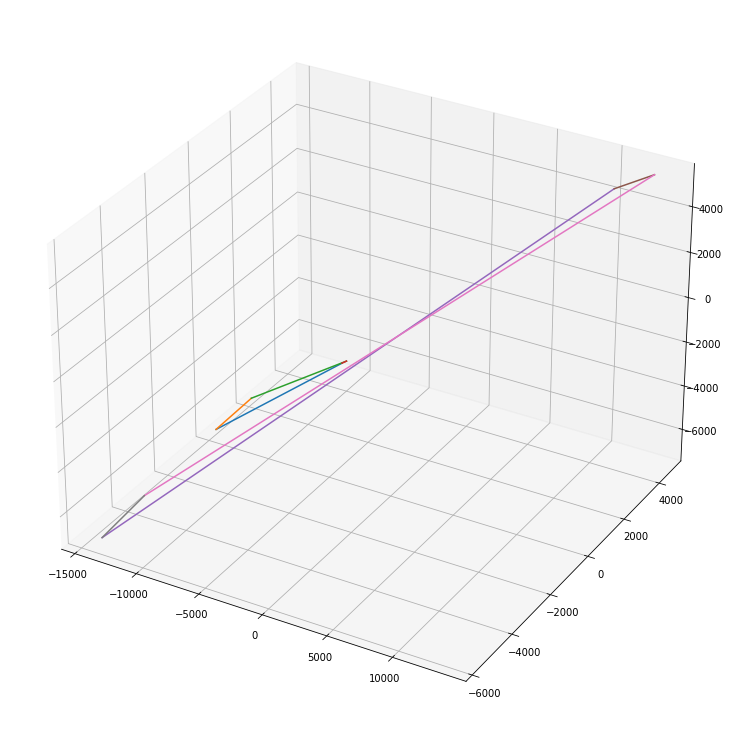

In [266]:
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)

def plot_line_util(point1, point2, ax=ax):
    print(f'Plotting line {point1} -> {point2}')
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    ax.plot3D(xs=[x1, x2], ys=[y1, y2], zs=[z1, z2])

def plot_line(orignum1, orignum2, ax=ax, coll=reconstructed_norm_mult):
    plot_line_util(coll[orignum1-1], coll[orignum2-1], ax=ax)

plot_line(1, 2)
plot_line(2, 3)
plot_line(3, 4)
plot_line(4, 1)
plot_line(5, 6)
plot_line(6, 7)
plot_line(7, 8)
plot_line(8, 5)





# ?ax.plot

# fig.show()

